In [5]:
import pandas as pd
df = pd.read_csv('data.csv',encoding='ISO-8859-1')
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [7]:
#Checking for missing values in the entire DataFrame
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
#Filling missing values in 'Gender' column with its mode
df['Description'] = df['Description'].fillna(df['Description'].mode()[0])

#Checking for missing values again
print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values before filling:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values after filling:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


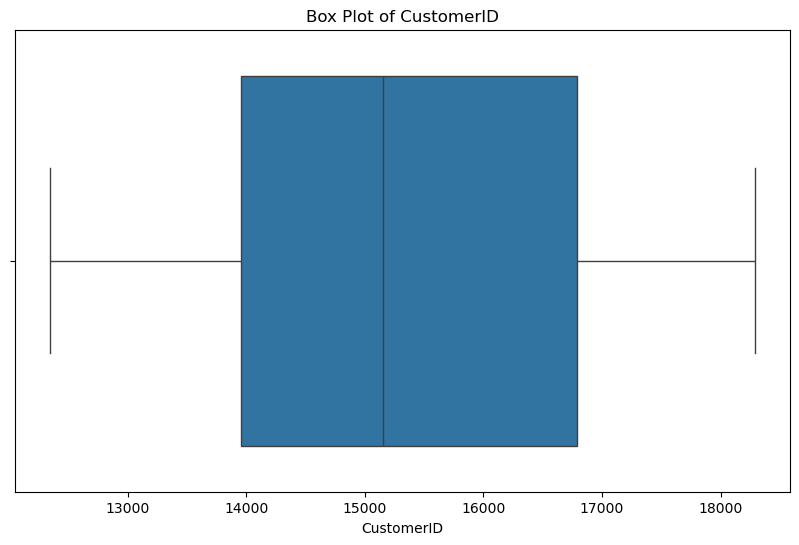

Outliers in CustomerID:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv',encoding='ISO-8859-1')
#Creating a box plot for the CustoMERID column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CustomerID'])
plt.title('Box Plot of CustomerID')
plt.xlabel('CustomerID')
plt.show()

#Calculating Q1 and Q3
Q1 = df['CustomerID'].quantile(0.25)
Q3 = df['CustomerID'].quantile(0.75)
IQR = Q3 - Q1

#Determining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['CustomerID'] < lower_bound) | (df['CustomerID'] > upper_bound)]

print("Outliers in CustomerID:")
print(outliers)

In [12]:
print("Missing values before filling:")
print(df['CustomerID'].isnull().sum())

#Calculating the mean of the CustoMERID column
mean_value = df['CustomerID'].mean()

#Filling missing values in CustoMERID with the mean
df['CustomerID'] = df['CustomerID'].fillna(mean_value)

#Checking for missing values after filling
print("\nMissing values after filling:")
print(df['CustomerID'].isnull().sum())

Missing values before filling:
135080

Missing values after filling:
0


In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [17]:
#RFM CALCULATIONS
#Recency (R): How recently a customer made a purchase. Calculate the number of days since the customer's last purchase

import pandas as pd
from datetime import datetime
#Converting 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Getting the current date 
current_date = df['InvoiceDate'].max()  

#Calculating Recency (days since the last purchase) for each customer
df['days_since_last_purchase'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (current_date - x.max()).days)

print(df[['CustomerID', 'InvoiceDate', 'days_since_last_purchase']].drop_duplicates())

        CustomerID         InvoiceDate  days_since_last_purchase
0          17850.0 2010-12-01 08:26:00                       301
7          17850.0 2010-12-01 08:28:00                       301
9          13047.0 2010-12-01 08:34:00                        31
25         13047.0 2010-12-01 08:35:00                        31
26         12583.0 2010-12-01 08:45:00                         2
...            ...                 ...                       ...
541865     13777.0 2011-12-09 12:23:00                         0
541867     13777.0 2011-12-09 12:25:00                         0
541869     15804.0 2011-12-09 12:31:00                         0
541890     13113.0 2011-12-09 12:49:00                         0
541894     12680.0 2011-12-09 12:50:00                         0

[25195 rows x 3 columns]


In [19]:
#Frequency (F): How often a customer makes a purchase

import pandas as pd
#Calculating Frequency (F) - total number of unique orders (InvoiceNo) for each customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='frequency')

print(frequency)

      CustomerID  frequency
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4368     18280.0          1
4369     18281.0          1
4370     18282.0          3
4371     18283.0         16
4372     18287.0          3

[4373 rows x 2 columns]


In [21]:
#Monetary (M): The total monetary value of a customer's purchases

#Calculating total spending per transaction (Quantity * UnitPrice)
df['total_spend'] = df['Quantity'] * df['UnitPrice']

#Calculating Monetary (M) - sum of total_spend for each customer
monetary = df.groupby('CustomerID')['total_spend'].sum().reset_index(name='monetary')

print(monetary)

      CustomerID  monetary
0        12346.0      0.00
1        12347.0   4310.00
2        12348.0   1797.24
3        12349.0   1757.55
4        12350.0    334.40
...          ...       ...
4368     18280.0    180.60
4369     18281.0     80.82
4370     18282.0    176.60
4371     18283.0   2094.88
4372     18287.0   1837.28

[4373 rows x 2 columns]


In [23]:
#Combining Recency (R), Frequency (F), and Monetary (M) into one DataFrame
rfm_df = frequency.merge(monetary, on='CustomerID').merge(df[['CustomerID', 'days_since_last_purchase']].drop_duplicates(), on='CustomerID')

print(rfm_df)

      CustomerID  frequency  monetary  days_since_last_purchase
0        12346.0          2      0.00                       325
1        12347.0          7   4310.00                         1
2        12348.0          4   1797.24                        74
3        12349.0          1   1757.55                        18
4        12350.0          1    334.40                       309
...          ...        ...       ...                       ...
4368     18280.0          1    180.60                       277
4369     18281.0          1     80.82                       180
4370     18282.0          3    176.60                         7
4371     18283.0         16   2094.88                         3
4372     18287.0          3   1837.28                        42

[4373 rows x 4 columns]


In [27]:
#RFM SEGMENTATION

rfm = rfm.drop_duplicates(subset=['frequency'])

#Assigning RFM scores based on quartiles (1 to 4)
rfm['R_score'] = pd.qcut(rfm['days_since_last_purchase'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

print(rfm[['CustomerID', 'R_score', 'F_score', 'M_score', 'RFM_score']])

      CustomerID R_score F_score M_score RFM_score
0        12346.0       1       1       1       111
1        12347.0       4       1       1       411
2        12348.0       1       1       1       111
3        12349.0       1       1       1       111
5        12352.0       1       1       1       111
...          ...     ...     ...     ...       ...
2799     16133.0       3       3       3       333
3015     16422.0       1       4       4       144
4024     17811.0       3       3       2       332
4043     17841.0       4       4       4       444
4234     18102.0       4       4       4       444

[66 rows x 5 columns]


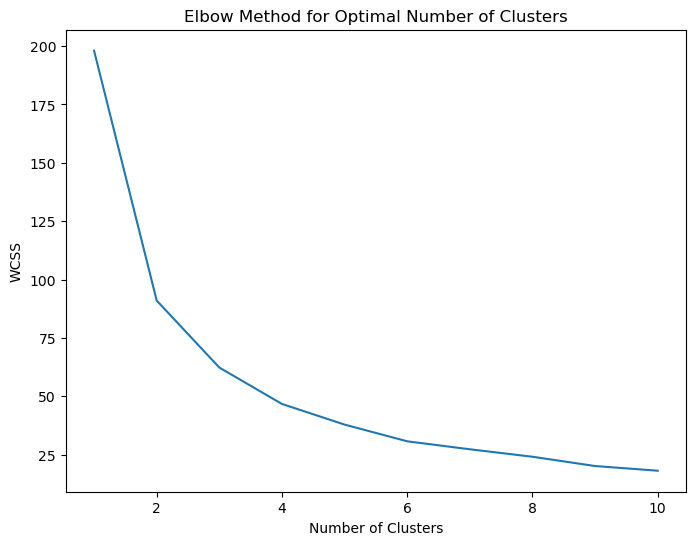

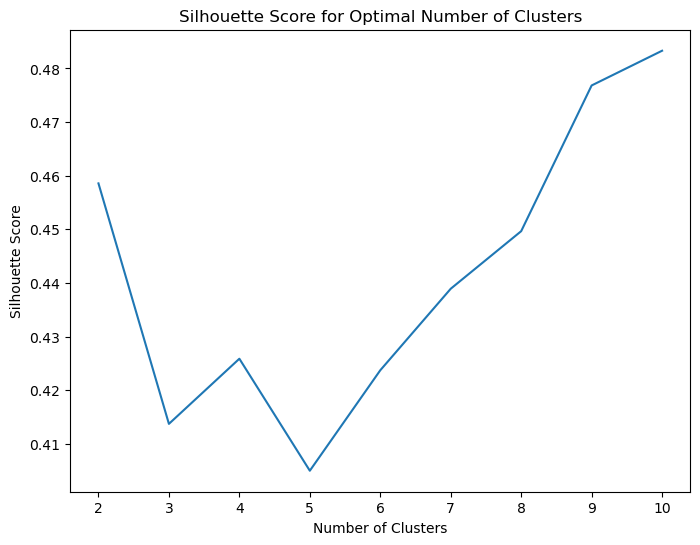

Cluster Summary:
           R_score   F_score   M_score
Cluster                              
0        3.583333  3.583333  3.500000
1        1.277778  1.222222  1.333333
2        3.470588  2.117647  1.882353
3        1.428571  3.000000  3.571429


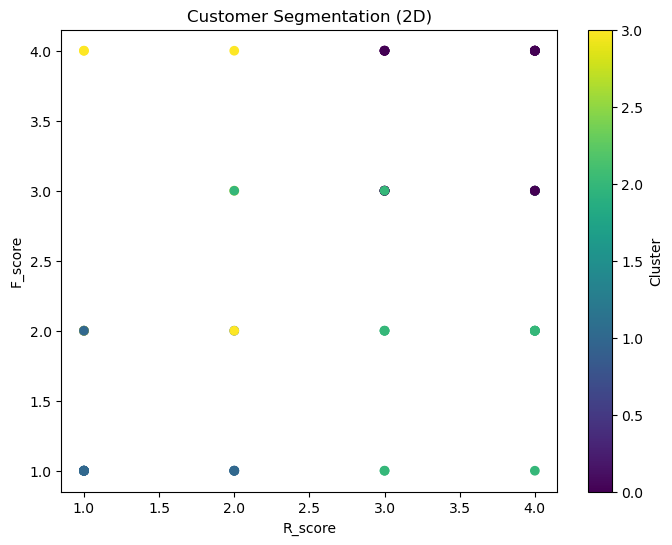

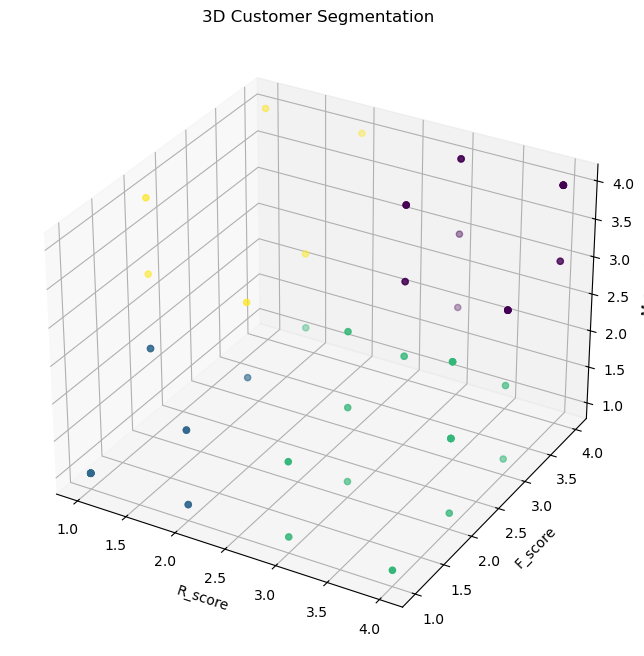

   CustomerID  R_score  F_score  M_score  Cluster
0     12346.0        1        1        1        1
1     12347.0        4        1        1        2
2     12348.0        1        1        1        1
3     12349.0        1        1        1        1
5     12352.0        1        1        1        1


In [29]:
#CUSTOMER SEGMENTATION

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)
rfm['M_score'] = rfm['M_score'].astype(int)

rfm_for_clustering = rfm[['R_score', 'F_score', 'M_score']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)

wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

sil_scores = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    sil_score = silhouette_score(rfm_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster')[['R_score', 'F_score', 'M_score']].mean()
print("Cluster Summary:\n", cluster_summary)

plt.figure(figsize=(8, 6))
plt.scatter(rfm['R_score'], rfm['F_score'], c=rfm['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (2D)')
plt.xlabel('R_score')
plt.ylabel('F_score')
plt.colorbar(label='Cluster')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['R_score'], rfm['F_score'], rfm['M_score'], c=rfm['Cluster'], cmap='viridis')
ax.set_xlabel('R_score')
ax.set_ylabel('F_score')
ax.set_zlabel('M_score')
plt.title('3D Customer Segmentation')
plt.show()

print(rfm[['CustomerID', 'R_score', 'F_score', 'M_score', 'Cluster']].head())

In [31]:
#2. Customer Analysis
#Finding the number of unique customers
unique_customers = rfm['CustomerID'].nunique()
print(f'Number of unique customers: {unique_customers}')

Number of unique customers: 66


In [35]:
print(rfm.columns)


Index(['CustomerID', 'frequency', 'monetary', 'days_since_last_purchase',
       'R_score', 'F_score', 'M_score', 'RFM_score', 'Cluster'],
      dtype='object')


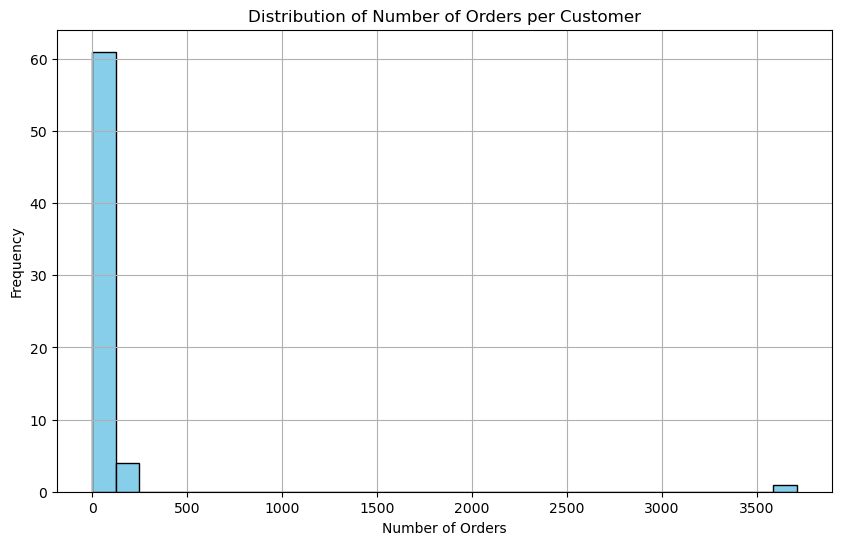

Top 5 customers with the most orders by order count:
2176    3710
1895     248
330      224
4043     169
1674     128
Name: frequency, dtype: int64


In [37]:
#Displaying the distribution of the number of orders per customer 
orders_per_customer = rfm['frequency']

plt.figure(figsize=(10, 6))
orders_per_customer.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

top_5_customers = orders_per_customer.sort_values(ascending=False).head(5)

print("Top 5 customers with the most orders by order count:")
print(top_5_customers)

In [47]:
#SEGMENT PROFILING

cluster_profile = rfm.groupby('Cluster')[['R_score', 'F_score', 'M_score', 'RFM_score']].mean()

segment_counts = rfm['Cluster'].value_counts()

profile_description = {}
for cluster_id in cluster_profile.index:
    r_score = cluster_profile.loc[cluster_id, 'R_score']
    f_score = cluster_profile.loc[cluster_id, 'F_score']
    m_score = cluster_profile.loc[cluster_id, 'M_score']
    
    if r_score > 3 and f_score > 3 and m_score > 3:
        segment = "High Value Customers"
    elif r_score <= 2 and f_score <= 2 and m_score <= 2:
        segment = "Low Value Customers"
    elif r_score <= 2 and f_score > 3 and m_score > 3:
        segment = "Frequent High Spenders"
    elif r_score > 3 and f_score <= 2 and m_score <= 2:
        segment = "Recent Low Spenders"
    else:
        segment = "Other Segment"

    profile_description[cluster_id] = {
        'R_score': r_score,
        'F_score': f_score,
        'M_score': m_score,
        'Customer_Count': segment_counts[cluster_id],
        'Segment_Description': segment
    }


segment_profiles_df = pd.DataFrame(profile_description).T
print(segment_profiles_df)

    R_score   F_score   M_score Customer_Count   Segment_Description
0  3.583333  3.583333       3.5             24  High Value Customers
1  1.277778  1.222222  1.333333             18   Low Value Customers
2  3.470588  2.117647  1.882353             17         Other Segment
3  1.428571       3.0  3.571429              7         Other Segment


In [49]:
#Marketing Recommendations:

import pandas as pd

#Grouping by Cluster to understand the characteristics of each segment
cluster_profile = rfm.groupby('Cluster')[['R_score', 'F_score', 'M_score', 'RFM_score']].mean()

#Profiling each cluster with RFM characteristics and creating tailored marketing strategies
marketing_recommendations = {
    'High Value Customers': {
        'Segment Description': 'High Recency, High Frequency, High Monetary',
        'RFM Characteristics': 'High R-score, High F-score, High M-score',
        'Recommendations': [
            'Loyalty Programs: Offer VIP rewards, early access to sales.',
            'Personalized Engagement: Personalized emails with product recommendations.',
            'Referral Programs: Encourage referrals with rewards.',
            'Exclusive Content: Offer webinars, exclusive previews.'
        ]
    },
    'Low Value Customers': {
        'Segment Description': 'Low Recency, Low Frequency, Low Monetary',
        'RFM Characteristics': 'Low R-score, Low F-score, Low M-score',
        'Recommendations': [
            'Re-engagement Campaigns: Win-back emails with special offers.',
            'Targeted Promotions: Offer time-limited discounts or gifts.',
            'Email Drip Campaigns: Use reminders and product highlights.',
            'Cross-Selling and Upselling: Introduce low-cost complementary products.'
        ]
    },
    'Frequent High Spenders': {
        'Segment Description': 'Low Recency, High Frequency, High Monetary',
        'RFM Characteristics': 'Low R-score, High F-score, High M-score',
        'Recommendations': [
            'Re-engagement Incentives: Offer exclusive discounts to encourage return purchases.',
            'Exclusive Access: Provide early access to new products or VIP sales.',
            'Subscription Models: Offer subscription services for frequently bought items.',
            'Personalized Offers: Provide personalized offers based on past spending.'
        ]
    },
    'Recent Low Spenders': {
        'Segment Description': 'High Recency, Low Frequency, Low Monetary',
        'RFM Characteristics': 'High R-score, Low F-score, Low M-score',
        'Recommendations': [
            'Onboarding Programs: Create strong onboarding experiences to showcase product value.',
            'Upsell and Cross-sell: Suggest higher-value products or bundles.',
            'Time-sensitive Discounts: Offer limited-time discounts to boost next purchase.',
            'Customer Education: Provide how-to guides or tutorials to drive interest.'
        ]
    },
    'Other Segments': {
        'Segment Description': 'Mixed RFM characteristics (varying R, F, M)',
        'RFM Characteristics': 'Varied R, F, and M scores',
        'Recommendations': [
            'Targeted Campaigns: Tailor marketing based on individual segment RFM scores.',
            'Seasonal Promotions: Use seasonal sales to increase engagement.',
            'Customer Segmentation Refinement: Continuously refine segments based on new data.',
            'Social Media Targeting: Use ads targeted at different segments for personalized offers.'
        ]
    }
}

print("Cluster Profiling (RFM Averages):")
print(cluster_profile)

print("\nTailored Marketing Strategies for Each Segment:")
for segment, details in marketing_recommendations.items():
    print(f"\nSegment: {segment}")
    print(f"Description: {details['Segment Description']}")
    print(f"RFM Characteristics: {details['RFM Characteristics']}")
    print("Recommendations:")
    for rec in details['Recommendations']:
        print(f"- {rec}")

Cluster Profiling (RFM Averages):
          R_score   F_score   M_score   RFM_score
Cluster                                          
0        3.583333  3.583333  3.500000  397.666667
1        1.277778  1.222222  1.333333  141.333333
2        3.470588  2.117647  1.882353  370.117647
3        1.428571  3.000000  3.571429  176.428571

Tailored Marketing Strategies for Each Segment:

Segment: High Value Customers
Description: High Recency, High Frequency, High Monetary
RFM Characteristics: High R-score, High F-score, High M-score
Recommendations:
- Loyalty Programs: Offer VIP rewards, early access to sales.
- Personalized Engagement: Personalized emails with product recommendations.
- Referral Programs: Encourage referrals with rewards.
- Exclusive Content: Offer webinars, exclusive previews.

Segment: Low Value Customers
Description: Low Recency, Low Frequency, Low Monetary
RFM Characteristics: Low R-score, Low F-score, Low M-score
Recommendations:
- Re-engagement Campaigns: Win-back ema

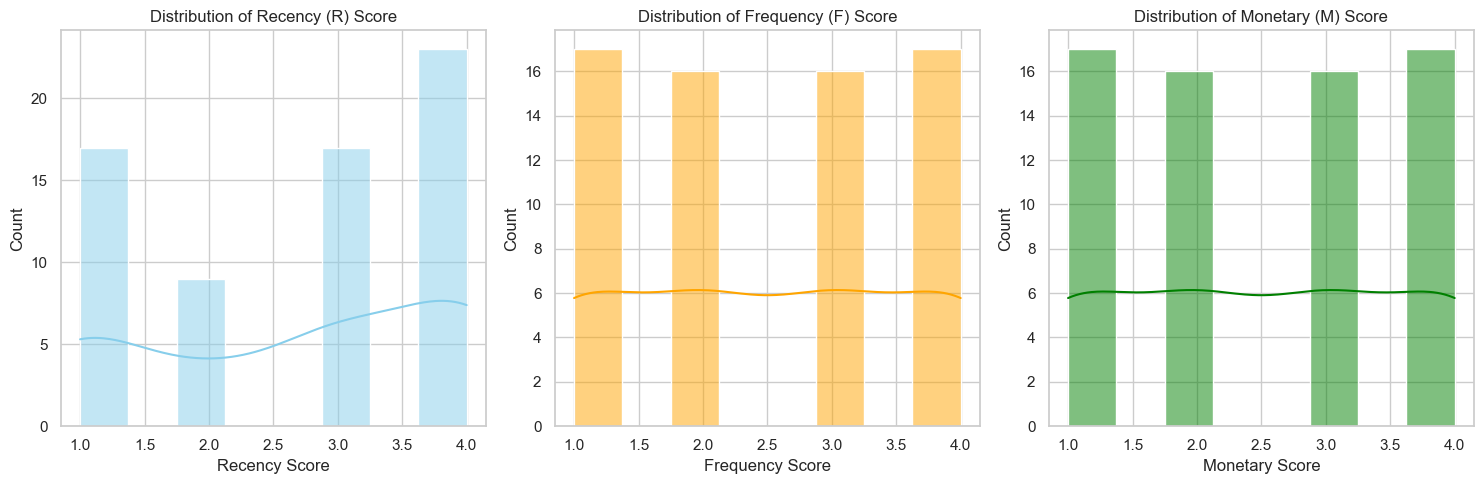

/var/folders/z2/5p5_b0_x7t7_2j_5f4nd9nq80000gn/T/ipykernel_35331/3172994053.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='R_score', data=rfm, palette='coolwarm')
/var/folders/z2/5p5_b0_x7t7_2j_5f4nd9nq80000gn/T/ipykernel_35331/3172994053.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='F_score', data=rfm, palette='coolwarm')
/var/folders/z2/5p5_b0_x7t7_2j_5f4nd9nq80000gn/T/ipykernel_35331/3172994053.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='M_score', data=rfm, palette='coo

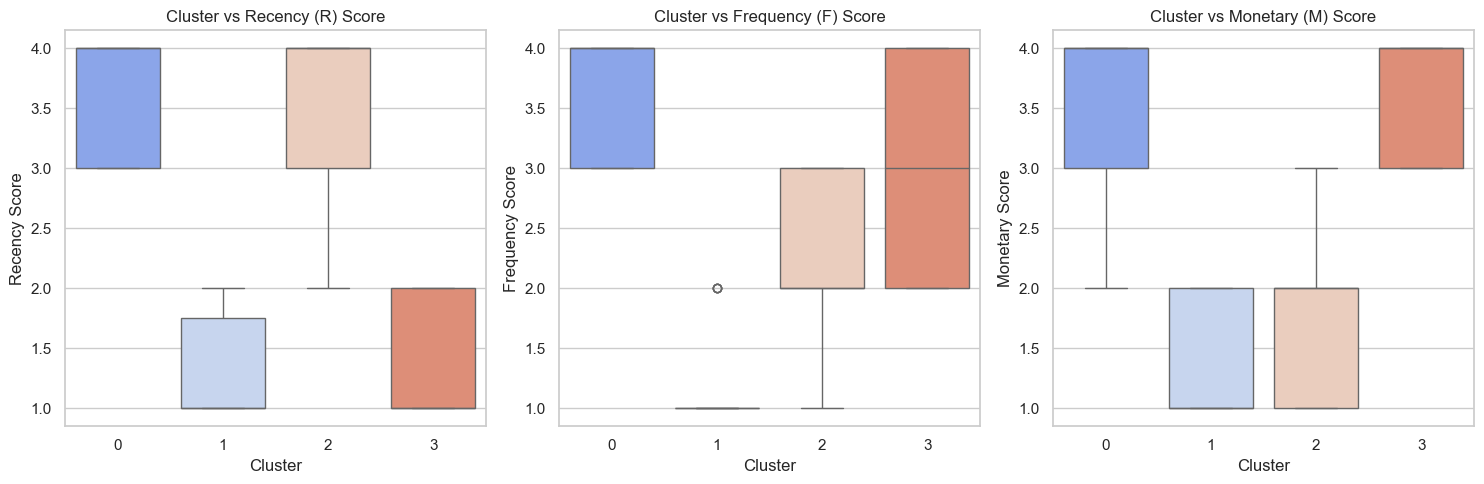

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has

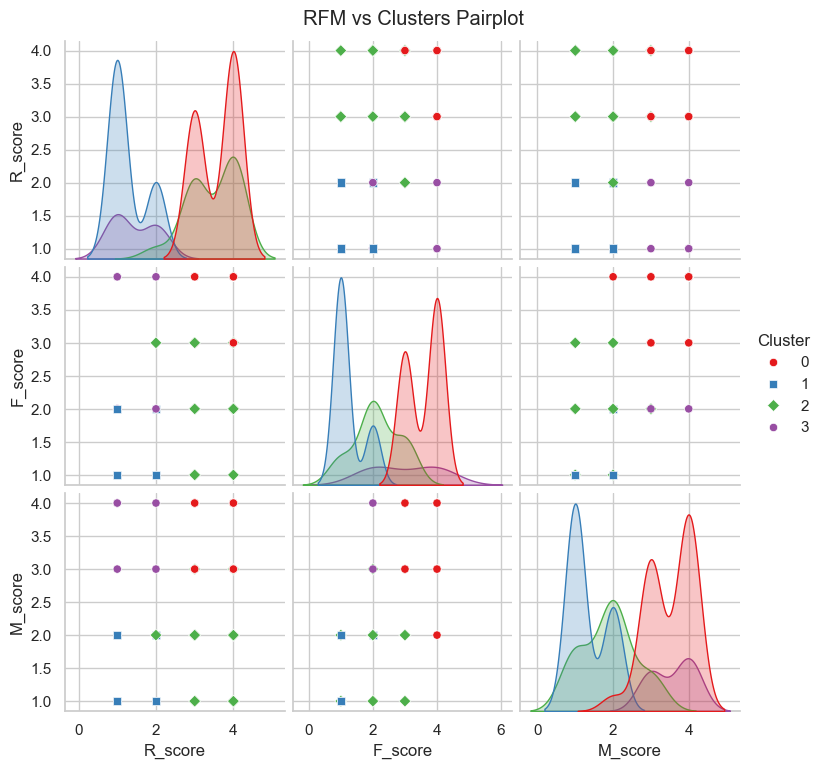

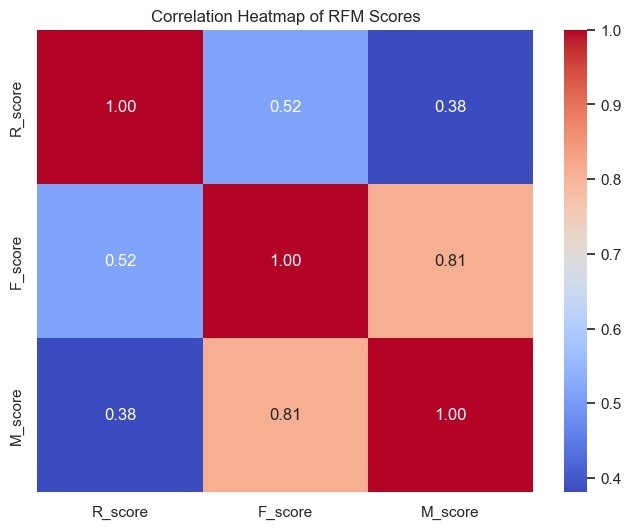

In [51]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

#RFM Score Distribution for Recency (R)
plt.subplot(1, 3, 1)
sns.histplot(rfm['R_score'], kde=True, color='skyblue')
plt.title('Distribution of Recency (R) Score')
plt.xlabel('Recency Score')
plt.ylabel('Count')

#RFM Score Distribution for Frequency (F)
plt.subplot(1, 3, 2)
sns.histplot(rfm['F_score'], kde=True, color='orange')
plt.title('Distribution of Frequency (F) Score')
plt.xlabel('Frequency Score')
plt.ylabel('Count')

#RFM Score Distribution for Monetary (M)
plt.subplot(1, 3, 3)
sns.histplot(rfm['M_score'], kde=True, color='green')
plt.title('Distribution of Monetary (M) Score')
plt.xlabel('Monetary Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Visualization 2: Clustering Distribution (Clusters vs Recency, Frequency, and Monetary)
plt.figure(figsize=(15, 5))

#Cluster Distribution for Recency (R)
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='R_score', data=rfm, palette='coolwarm')
plt.title('Cluster vs Recency (R) Score')
plt.xlabel('Cluster')
plt.ylabel('Recency Score')

#Cluster Distribution for Frequency (F)
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='F_score', data=rfm, palette='coolwarm')
plt.title('Cluster vs Frequency (F) Score')
plt.xlabel('Cluster')
plt.ylabel('Frequency Score')

#Cluster Distribution for Monetary (M)
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='M_score', data=rfm, palette='coolwarm')
plt.title('Cluster vs Monetary (M) Score')
plt.xlabel('Cluster')
plt.ylabel('Monetary Score')

plt.tight_layout()
plt.show()

#Visualization 3: RFM vs Clusters - Pairplot (to visualize relationships between R, F, M with Cluster labels)
sns.pairplot(rfm[['R_score', 'F_score', 'M_score', 'Cluster']], hue='Cluster', palette='Set1', markers=["o", "s", "D"])
plt.suptitle("RFM vs Clusters Pairplot", y=1.02)
plt.show()

#Visualization 4: Heatmap - Correlation between R, F, M Scores
rfm_corr = rfm[['R_score', 'F_score', 'M_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of RFM Scores')
plt.show()


In [59]:
#Product Analysis

# 1. Top 10 Most Frequently Purchased Products
top_10_products = df['Description'].value_counts().head(10)
print("Top 10 Most Frequently Purchased Products:")
print(top_10_products)

# 2. Average Price of Products
#Calculating the total price for each product (Price * Quantity)
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

#Calculating the average price per product description
average_price = df.groupby('Description')['TotalPrice'].sum() / df.groupby('Description')['Quantity'].sum()
average_price_value = average_price.mean()
print(f"\nAverage Price of Products: {average_price_value:.2f}")

# 3. Revenue by Product (Total Revenue for each product)
revenue_by_product = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
top_product = revenue_by_product.head(1)
print(f"\nProduct with Highest Revenue: {top_product}")


Top 10 Most Frequently Purchased Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

Average Price of Products: inf

Product with Highest Revenue: Description
DOTCOM POSTAGE    206245.48
Name: TotalPrice, dtype: float64


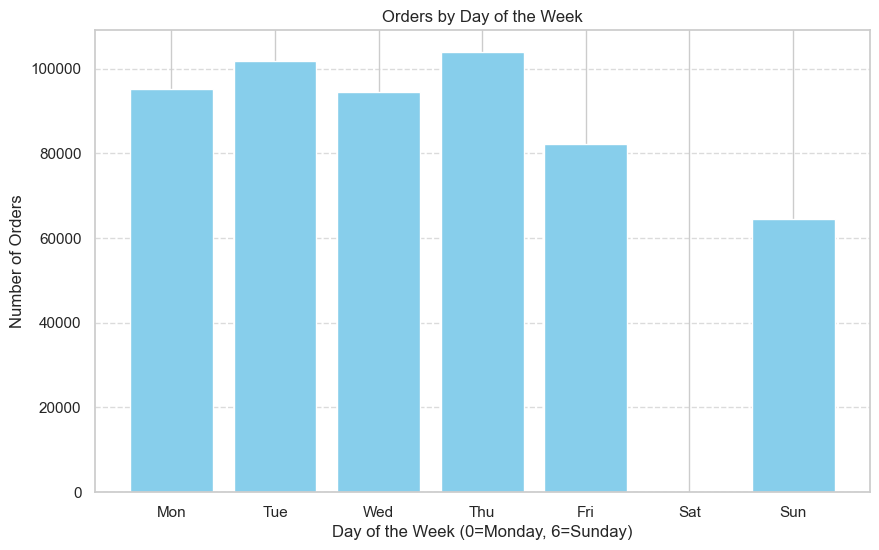

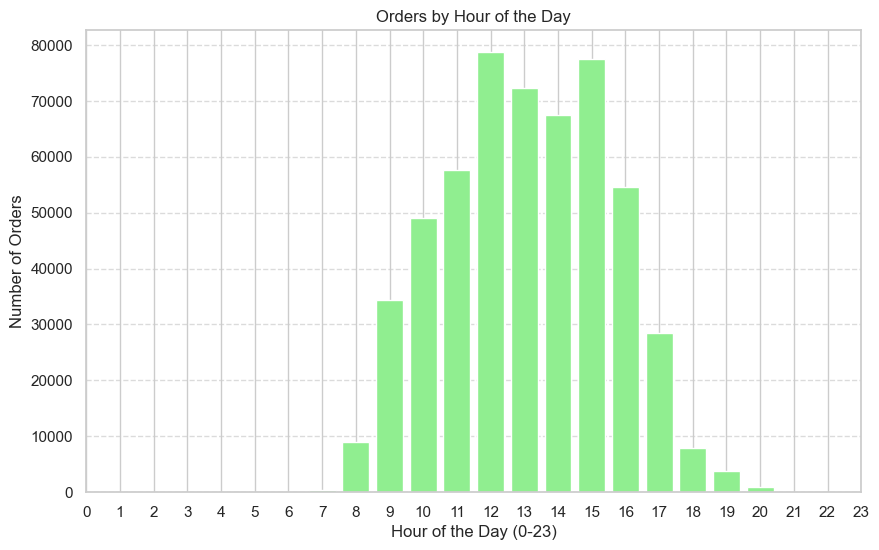

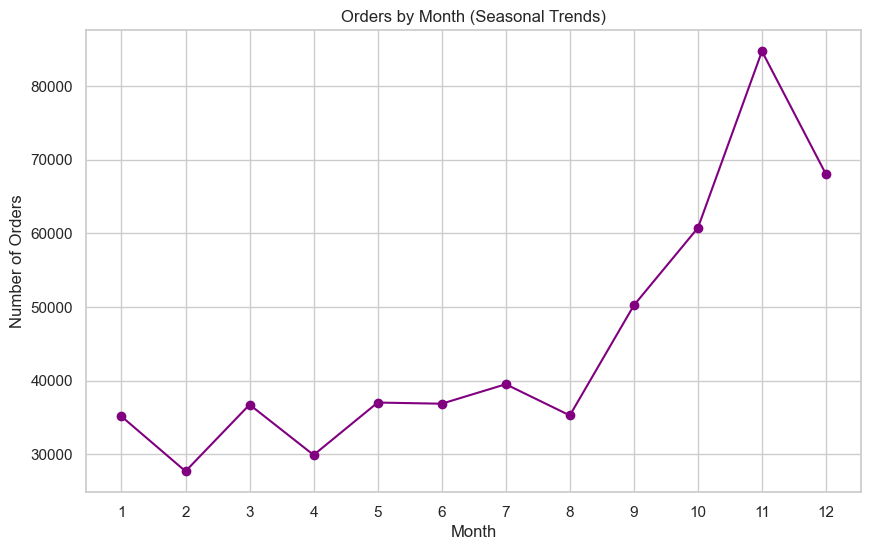

In [63]:
#Time Analysis

import matplotlib.pyplot as plt

# 1. Day of the Week or Time of Day Analysis
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
#Extracting hour of the day (0-23)
df['HourOfDay'] = df['InvoiceDate'].dt.hour

orders_by_day = df['DayOfWeek'].value_counts().sort_index()

orders_by_hour = df['HourOfDay'].value_counts().sort_index()

#Plotting Orders by Day of the Week
plt.figure(figsize=(10, 6))
plt.bar(orders_by_day.index, orders_by_day.values, color='skyblue')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#Plotting Orders by Hour of the Day
plt.figure(figsize=(10, 6))
plt.bar(orders_by_hour.index, orders_by_hour.values, color='lightgreen')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24, 1))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Seasonal Trends Analysis (Month-based analysis)
df['Month'] = df['InvoiceDate'].dt.month
orders_by_month = df['Month'].value_counts().sort_index()

# Plotting Seasonal Trends
plt.figure(figsize=(10, 6))
plt.plot(orders_by_month.index, orders_by_month.values, marker='o', color='purple')
plt.title('Orders by Month (Seasonal Trends)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


Top 5 Countries with the Highest Number of Orders:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64


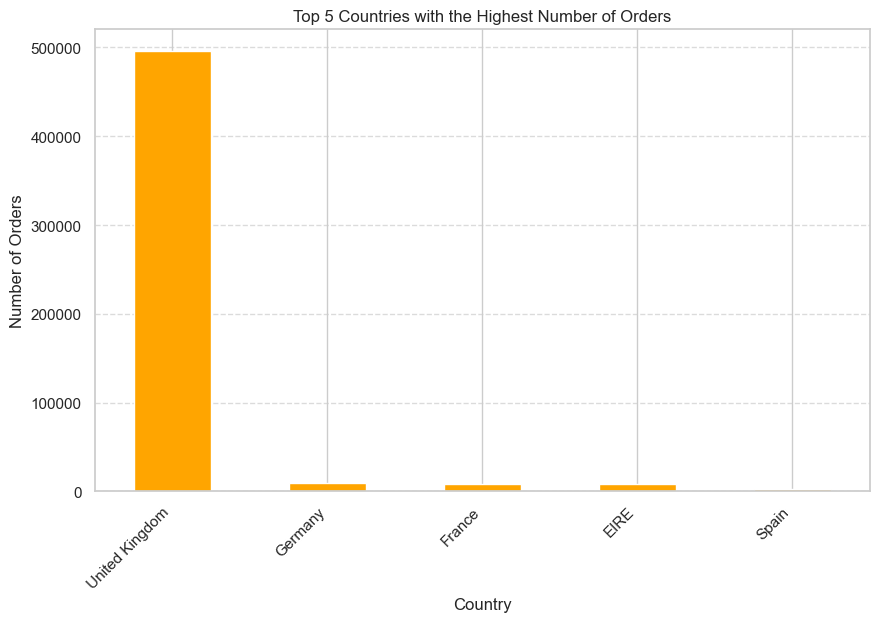


Average Order Value (AOV) by Country:
Country
Australia               1986.627101
Austria                  534.437895
Bahrain                  137.100000
Belgium                  343.789580
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          608.675455
Cyprus                   647.314500
Czech Republic           141.544000
Denmark                  893.720952
EIRE                     731.324500
European Community       258.350000
Finland                  465.140417
France                   428.208026
Germany                  367.658723
Greece                   785.086667
Hong Kong                674.469333
Iceland                  615.714286
Israel                   878.646667
Italy                    307.100182
Japan                   1262.165000
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    250.547000
Netherlands             2818.431089
Norway                   879.086500
Poland           

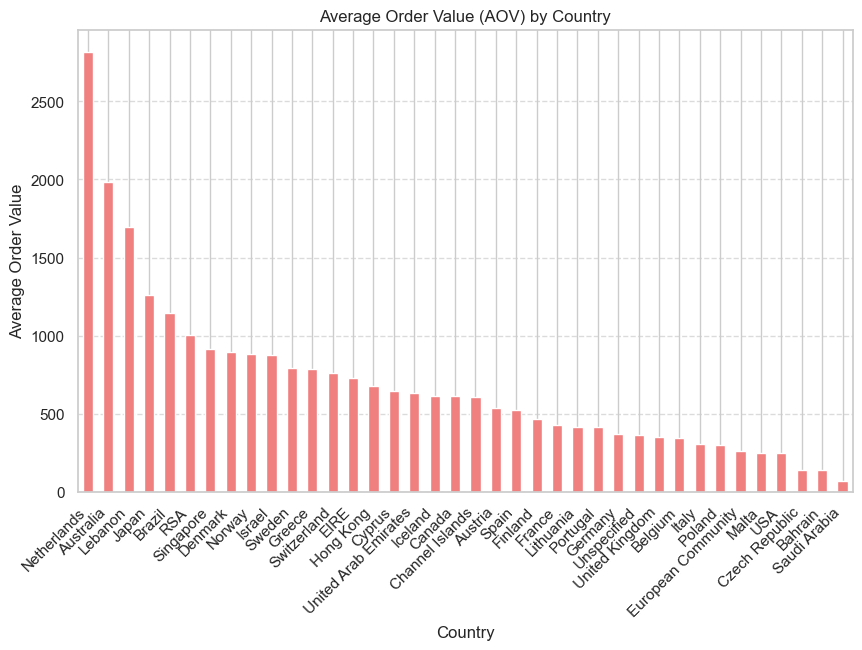


Correlation between Country and Average Order Value (AOV): -0.05666557376273552


In [69]:
#Geographical Analysis

from sklearn.preprocessing import LabelEncoder

# 1. Top 5 Countries with the Highest Number of Orders
orders_by_country = df['Country'].value_counts().head(5)

print("Top 5 Countries with the Highest Number of Orders:")
print(orders_by_country)

#Plotting the top 5 countries with the highest number of orders
plt.figure(figsize=(10, 6))
orders_by_country.plot(kind='bar', color='orange')
plt.title('Top 5 Countries with the Highest Number of Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Correlation Between Customer's Country and Average Order Value (AOV)

#Calculating total order value per country
aov_by_country = df.groupby('Country')['TotalPrice'].sum() / df.groupby('Country')['InvoiceNo'].nunique()

print("\nAverage Order Value (AOV) by Country:")
print(aov_by_country)

plt.figure(figsize=(10, 6))
aov_by_country.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Average Order Value (AOV) by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Correlation Check between Country and AOV using LabelEncoder
#Encoding countries as numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['CountryEncoded'] = label_encoder.fit_transform(df['Country'])

aov_by_country = df.groupby('Country')['TotalPrice'].sum() / df.groupby('Country')['InvoiceNo'].nunique()

aov_with_country = pd.DataFrame({
    'CountryEncoded': df.groupby('Country')['CountryEncoded'].first(),  # Take the first encoded value per country
    'AOV': aov_by_country
})

correlation = aov_with_country['AOV'].corr(aov_with_country['CountryEncoded'])

print(f"\nCorrelation between Country and Average Order Value (AOV): {correlation}")

Average active duration (in days): 133.44
            total_spend  purchase_count  recency  segment
CustomerID                                               
12346.0            0.00               2      325        2
12347.0         4310.00               7        1        0
12348.0         1797.24               4       74        0
12349.0         1757.55               1       18        0
12350.0          334.40               1      309        2


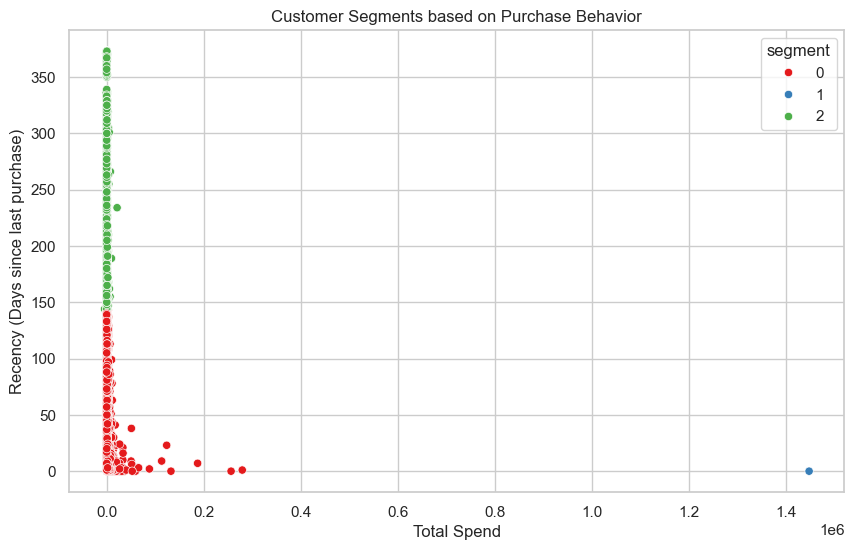

In [75]:
#Customer Behavior

first_last_purchase = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
first_last_purchase['active_duration'] = (first_last_purchase['max'] - first_last_purchase['min']).dt.days
#average active duration of customers
average_active_duration = first_last_purchase['active_duration'].mean()
print(f"Average active duration (in days): {average_active_duration:.2f}")

# 2. Customer segmentation based on purchase behavior
customer_behavior = df.groupby('CustomerID').agg(
    total_spend=('TotalPrice', 'sum'),
    purchase_count=('InvoiceNo', 'nunique'),
    recency=('days_since_last_purchase', 'min')
)

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
behavior_scaled = scaler.fit_transform(customer_behavior)

kmeans = KMeans(n_clusters=3, random_state=42)
customer_behavior['segment'] = kmeans.fit_predict(behavior_scaled)

print(customer_behavior.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_behavior, x='total_spend', y='recency', hue='segment', palette='Set1')
plt.title('Customer Segments based on Purchase Behavior')
plt.xlabel('Total Spend')
plt.ylabel('Recency (Days since last purchase)')
plt.show()


Return rate by product category:
                 return_rate
ProductCategory             
Books                  100.0
Gifts                  100.0
Other                  100.0


/var/folders/z2/5p5_b0_x7t7_2j_5f4nd9nq80000gn/T/ipykernel_35331/4171358047.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_returns.index, y=category_returns['return_rate'], palette='Set2')


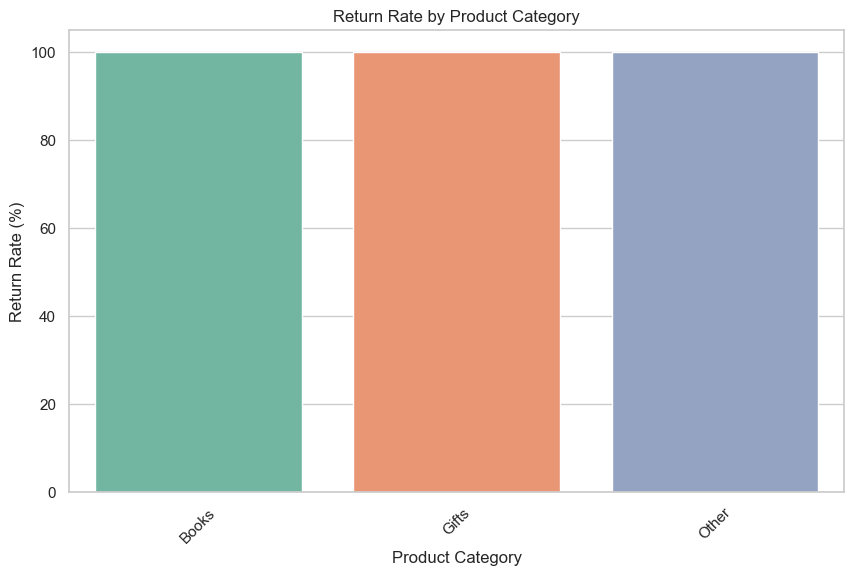


Percentage of orders with returns or refunds: 19.97%


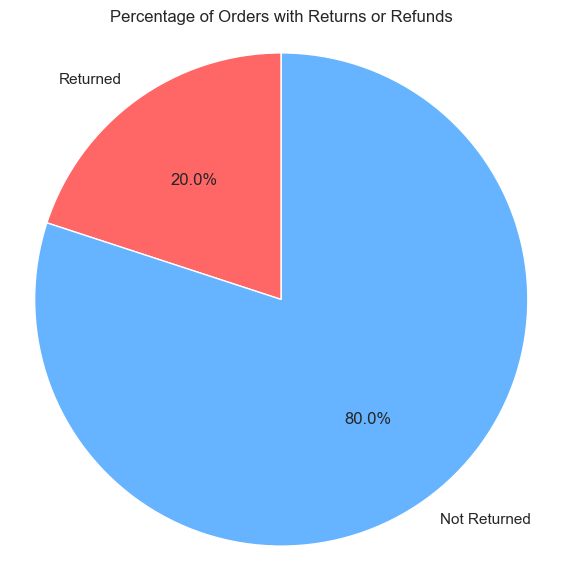

In [79]:
#Returns and Refunds Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def categorize_product(description):
    description = str(description).lower()
    
    if 'gift' in description:
        return 'Gifts'
    elif 'shirt' in description:
        return 'Apparel'
    elif 'book' in description:
        return 'Books'
    elif 'electronic' in description:
        return 'Electronics'
    else:
        return 'Other'

df['ProductCategory'] = df['Description'].apply(categorize_product)

df_returns = df[df['Quantity'] < 0]

category_returns = df_returns.groupby('ProductCategory').agg(
    total_returns=('InvoiceNo', 'nunique'),
    total_orders=('InvoiceNo', 'nunique')
)

category_returns['return_rate'] = (category_returns['total_returns'] / category_returns['total_orders']) * 100

print("\nReturn rate by product category:")
print(category_returns[['return_rate']])

plt.figure(figsize=(10, 6))
sns.barplot(x=category_returns.index, y=category_returns['return_rate'], palette='Set2')
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()

total_orders = df['InvoiceNo'].nunique()
total_returns = df_returns['InvoiceNo'].nunique()

return_percentage = (total_returns / total_orders) * 100

print(f"\nPercentage of orders with returns or refunds: {return_percentage:.2f}%")

labels = ['Returned', 'Not Returned']
sizes = [total_returns, total_orders - total_returns]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'])
plt.title('Percentage of Orders with Returns or Refunds')
plt.axis('equal')
plt.show()

Total Profit Generated by the Company: $3899099.17

Top 5 Products with the Highest Profit Margins:
                                 total_profit  profit_margin
Description                                                 
PINK/BLUE DISC/MIRROR STRING           90.180           40.0
DOLLCRAFT BOY JEAN-PAUL               149.560           40.0
SET/4 GARDEN ROSE DINNER CANDLE         4.620           40.0
FLOWER FAIRY INCENSE BOUQUET           12.940           40.0
PINK POODLE HANGING DECORATION          4.896           40.0


/var/folders/z2/5p5_b0_x7t7_2j_5f4nd9nq80000gn/T/ipykernel_35331/1918934532.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_products.index, y=top_5_products['profit_margin'], palette='Blues_d')


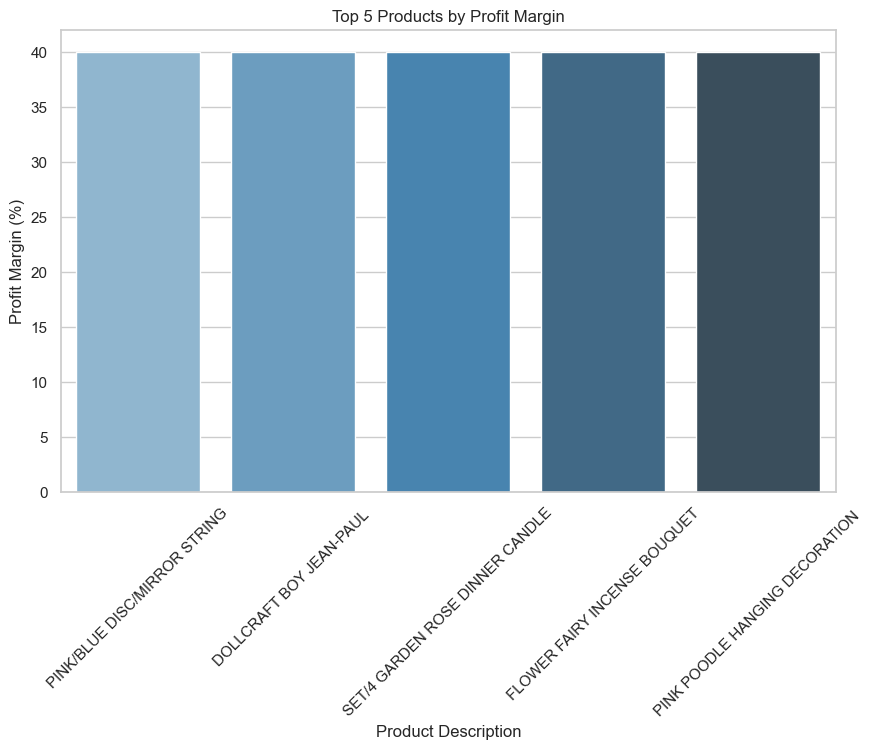

In [81]:
#Profitability Analysis

import pandas as pd

profit_margin_percentage = 0.4  # Example: 40% profit margin, so 60% of UnitPrice is cost
df['Profit'] = df['TotalPrice'] * profit_margin_percentage

total_profit = df['Profit'].sum()
print(f"Total Profit Generated by the Company: ${total_profit:.2f}")

product_profit = df.groupby('Description').agg(
    total_profit=('Profit', 'sum'),
    total_revenue=('TotalPrice', 'sum')
)

product_profit['profit_margin'] = (product_profit['total_profit'] / product_profit['total_revenue']) * 100

top_5_products = product_profit.sort_values(by='profit_margin', ascending=False).head(5)

print("\nTop 5 Products with the Highest Profit Margins:")
print(top_5_products[['total_profit', 'profit_margin']])

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_products.index, y=top_5_products['profit_margin'], palette='Blues_d')
plt.title('Top 5 Products by Profit Margin')
plt.xlabel('Product Description')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

In [83]:
#Customer Satisfaction
#Repeat Purchases Analysis
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

repeat_customers = customer_orders[customer_orders > 1]

repeat_customer_percentage = (len(repeat_customers) / len(customer_orders)) * 100
print(f"Percentage of Repeat Customers: {repeat_customer_percentage:.2f}%")

Percentage of Repeat Customers: 69.97%


In [85]:
#Product Return Analysis

df_returns = df[df['Quantity'] < 0]

total_orders = len(df)
returns_orders = len(df_returns)
return_percentage = (returns_orders / total_orders) * 100
print(f"Percentage of Orders with Returns: {return_percentage:.2f}%")

product_returns = df_returns.groupby('Description').agg(
    total_returns=('InvoiceNo', 'nunique'),
    total_orders=('InvoiceNo', 'nunique')
)

product_returns['return_rate'] = (product_returns['total_returns'] / product_returns['total_orders']) * 100

top_5_returned_products = product_returns.sort_values(by='return_rate', ascending=False).head(5)
print("\nTop 5 Products with the Highest Return Rates:")
print(top_5_returned_products[['return_rate']])

Percentage of Orders with Returns: 1.96%

Top 5 Products with the Highest Return Rates:
                                return_rate
Description                                
 50'S CHRISTMAS GIFT BAG LARGE        100.0
RED RETROSPOT STORAGE JAR             100.0
RED RETROSPOT SHOPPING BAG            100.0
RED RETROSPOT SHOPPER BAG             100.0
RED RETROSPOT ROUND CAKE TINS         100.0


/var/folders/z2/5p5_b0_x7t7_2j_5f4nd9nq80000gn/T/ipykernel_35331/209310887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Repeat Customers"], y=[repeat_customer_percentage], palette='Blues')


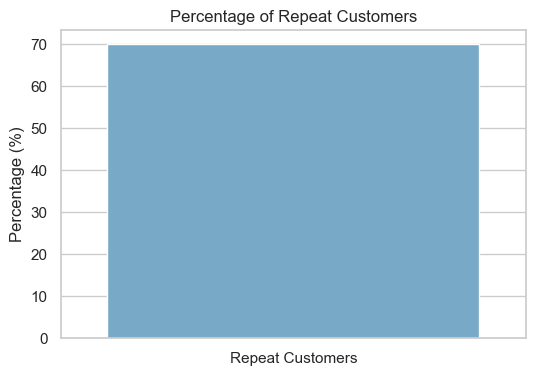

/var/folders/z2/5p5_b0_x7t7_2j_5f4nd9nq80000gn/T/ipykernel_35331/209310887.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_returned_products.index, y=top_5_returned_products['return_rate'], palette='Reds_d')


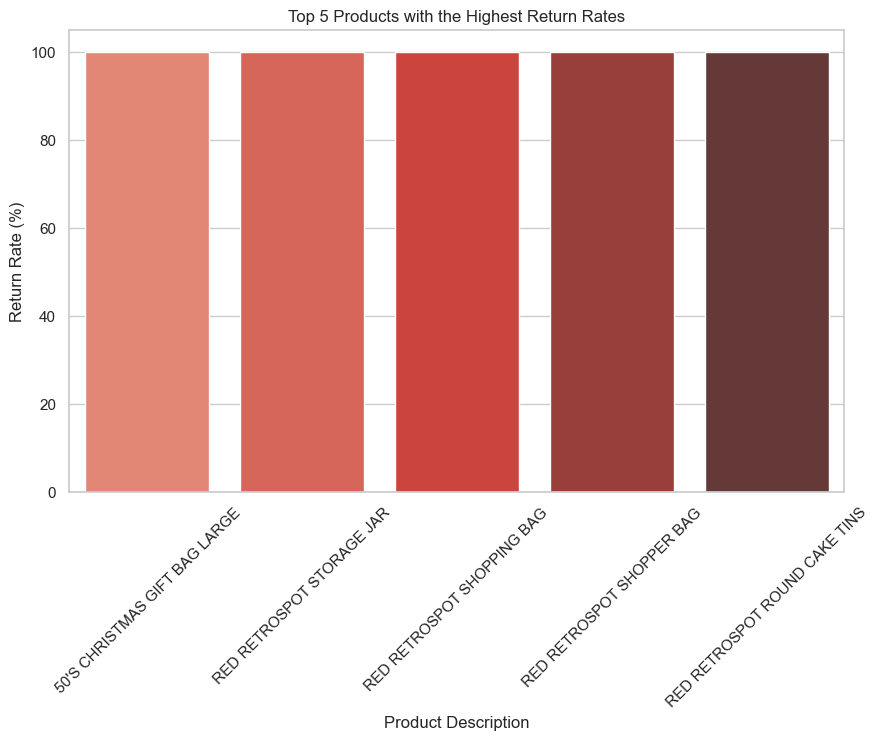

In [87]:
#Visualization for Customer Satisfaction Analysis

import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing Repeat Customer Percentage
plt.figure(figsize=(6, 4))
sns.barplot(x=["Repeat Customers"], y=[repeat_customer_percentage], palette='Blues')
plt.title('Percentage of Repeat Customers')
plt.ylabel('Percentage (%)')
plt.show()

#Visualizing Top 5 Products with the Highest Return Rates
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_returned_products.index, y=top_5_returned_products['return_rate'], palette='Reds_d')
plt.title('Top 5 Products with the Highest Return Rates')
plt.xlabel('Product Description')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()
